In [ ]:
## Aggregating MQTT Data

In [12]:
import datetime
from Adafruit_IO import *
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
dStamp=datetime.datetime.now().strftime("%m_%d_%Y")
hashPath = '/Users/cad/simpHashes/csIO.txt'

In [35]:
def connect_REST(hashPath):
    simpHash=open(hashPath)
    a=list(simpHash)
    userName = a[0].strip()
    apiKey = a[1]
    restClient = Client(userName,apiKey)
    return restClient
    
def connect_MQTT(hashPath):
    simpHash=open(hashPath)
    a=list(simpHash)
    userName = a[0].strip()
    apiKey = a[1]
    mqttClient = MQTTClient(userName,apiKey)
    return mqttClient

def makeMQTTDataFrame(feedName):
    tCreated_ats=[]
    tDates=[]
    tTimes=[]
    tIDs = []
    tValues=[]
    tFeedNames = []
    count = []
    counter = 0
    allData = aio.data(feedName)
    for x in allData:
        tCreated_ats.append(x.created_at)
        tS=x.created_at.split('T')
        tDates.append(tS[0])
        tTimes.append(tS[1])
        tIDs.append(x.id)
        tValues.append(float(x.value))
        tFeedNames.append(feedName)
        counter = counter + 1
        count.append(counter)

    tempArray = [count,tFeedNames,tCreated_ats,tDates,tTimes,tIDs,tValues]
    varIndex = ['count','feed_name','created_at','date','time','id','value']
    tempArray=list(list(zip(*tempArray)))
    newDF = pd.DataFrame(tempArray,columns = varIndex)
    return newDF

In [53]:
aio=connect_REST(hashPath)
# check all the feeds
# This will make a list of all feeds.
allFeeds = aio.feeds()

feedList = []
for things in allFeeds:
    feedList.append(things.name)
print(feedList)

['rig-cadbook', 'cad-rig', 'cad-waterconsumed', 'cad-topvol', 'cad-weight', 'cad2-rig', 'cad2-waterconsumed', 'cad2-topvol', 'cad2-weight', 'newFeed', 'cadbook', 'rig-ubuntu', 'cad-task', 'cad-targetconsumption', 'cad-performance', 'ci01-rig', 'ci01-task', 'ci01-waterconsumed', 'ci01-targetconsumption', 'ci01-weight', 'ci01-performance', 'strongsad-rig', 'strongsad-task', 'strongsad-waterconsumed', 'strongsad-targetconsumption', 'strongsad-weight', 'strongsad-performance', 'an1-rig', 'an1-task', 'an1-waterconsumed', 'an1-targetconsumption', 'an1-weight', 'an1-performance', 'rig-cstwophotona']


In [58]:
feedName = "cad-notes"
feed = Feed(feedName)
createResult = aio.create_feed(feed)

In [62]:
subj = 'cad'
cNote = 'If I make a seperate feed, then no need for the subject header'
data = Data(value= cNote)
aio.create_data(feedName, data)

Data(created_epoch=1542121023, created_at='2018-11-13T14:57:03Z', updated_at=None, value='If I make a seperate feed, then no need for the subject header', completed_at=None, feed_id=910914, expiration='2019-01-12T14:57:03Z', position=None, id='0E0T3W457V7YEYN621Z3EH4ZCR', lat=None, lon=None, ele=None)

In [51]:
cadWater = makeMQTTDataFrame('cad-waterconsumed')
cadWeight = makeMQTTDataFrame('cad-weight')

KeyboardInterrupt: 

In [10]:
import seaborn as sns

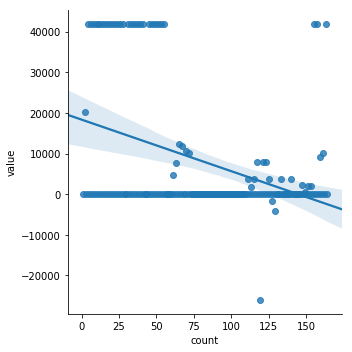

In [48]:
sns.lmplot(x='count', y='value', data=cadWeight)

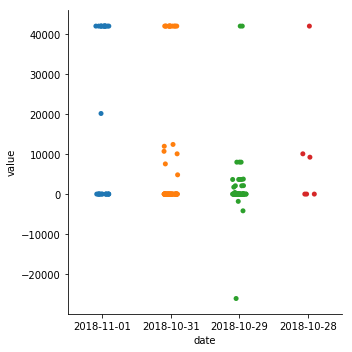

In [49]:
sns.catplot(x="date", y="value", data=cadWeight);

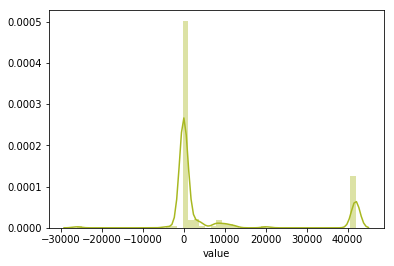

In [50]:
sns.distplot(cadWeight['value'],color='#A8B820');